In [ ]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline

#statsmodels tools
import statsmodels.api as sm
from statsmodels.datasets import nile
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Airpassangers_df=pd.read_csv('/content/drive/MyDrive/Time Series Folder/AirPassengers.csv', index_col=[0], squeeze=True,parse_dates=True)

In [ ]:
Airpassangers_df

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [ ]:
type(Airpassangers_df)

pandas.core.series.Series

In [ ]:
Airpassangers_df.tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [ ]:
Airpassangers_df.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

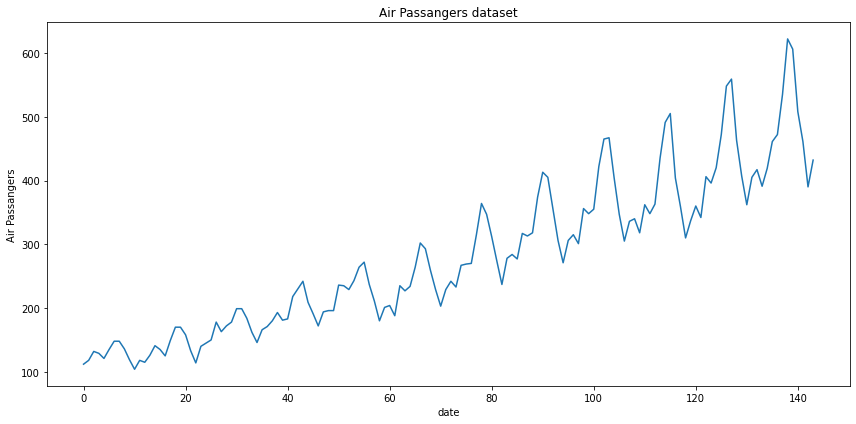

In [ ]:
#plot
plt.figure(figsize=(12,6))
plt.plot(Airpassangers_df.values)
plt.xlabel('date')
plt.ylabel('Air Passangers')
plt.title('Air Passangers dataset')
plt.tight_layout()
plt.show()

Here we can clearly see that there is a trend in the time series and there may be a chance to present seasonality in the time series.

To check for all of the components in the time series by decomposition, we can use the python library statsmodel provided seasonal_decompose package.

In [ ]:
# additive decompostion model
Airpassangers_result_add=seasonal_decompose(Airpassangers_df,model= "additive", period=4)

<Figure size 1440x432 with 0 Axes>

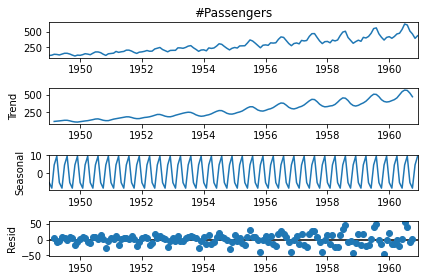

In [ ]:
# plot it
plt.figure(figsize=(20,6))
Airpassangers_result_add.plot()
plt.show()

Here we can clearly see the variability of the residual in the additive model

In [ ]:
# Multiplicative decompostion model
Airpassangers_result_multi=seasonal_decompose(Airpassangers_df,model= "multiplicative")

<Figure size 1440x432 with 0 Axes>

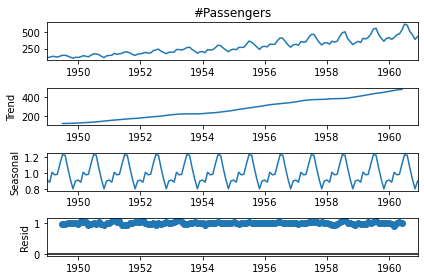

In [ ]:
# plot it
plt.figure(figsize=(20,6))
Airpassangers_result_multi.plot()
plt.show()

Here we can clearly see by visualization that there is trend and season is present in the time series also the residual is showing high variability.

### We can also visualize the components separately.

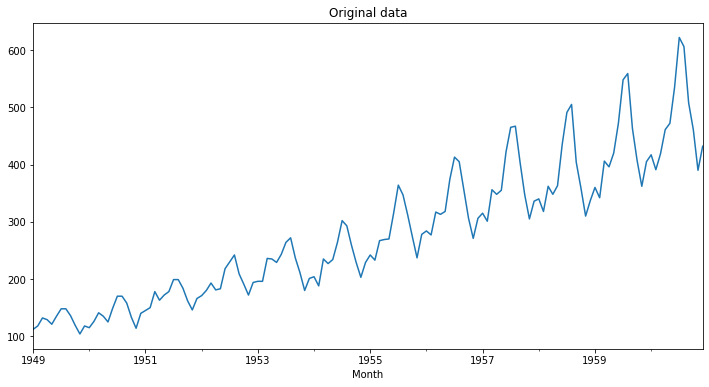

In [ ]:
observed=Airpassangers_result_add.observed
plt.figure(figsize=(12,6))
observed.plot()
plt.title('Original data')
plt.show()


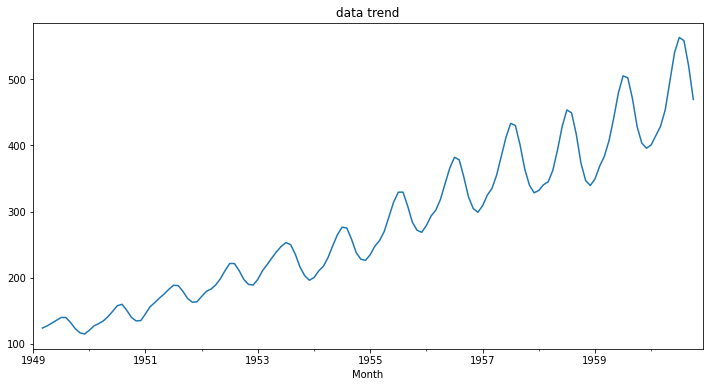

In [ ]:
#Visualizing the trend
trend=Airpassangers_result_add.trend
plt.figure(figsize=(12,6))
trend.plot()
plt.title('data trend')
plt.show()

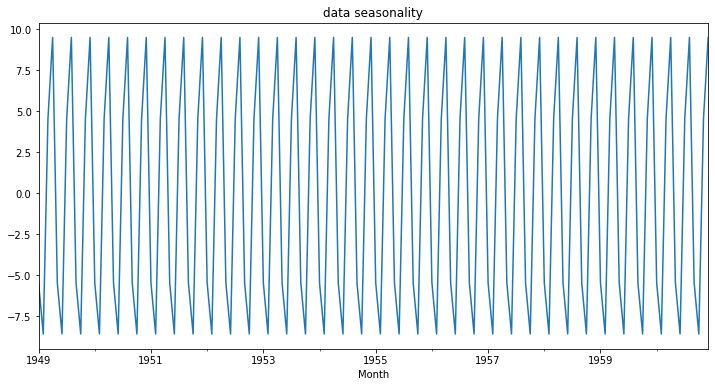

In [ ]:
#Visualizing the tseasonality
seasonal=Airpassangers_result_add.seasonal
plt.figure(figsize=(12,6))
seasonal.plot()
plt.title('data seasonality')
plt.show()

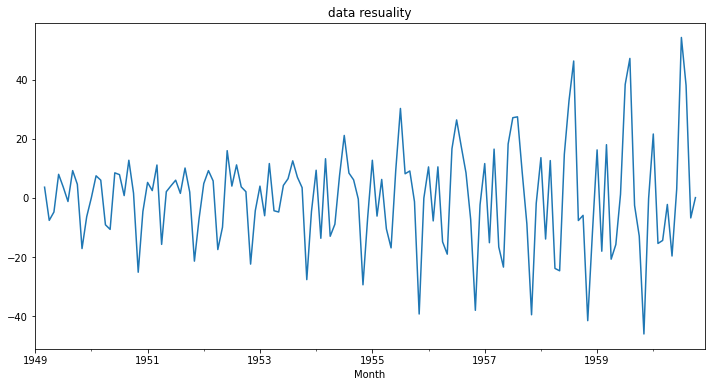

In [ ]:
#Visualizing the resuality
residue=Airpassangers_result_add.resid
plt.figure(figsize=(12,6))
residue.plot()
plt.title('data resuality')
plt.show()

### Saveing the components in tabular form by simply concatenating them 

In [ ]:
components=pd.concat([trend,seasonal, residue, observed], axis=1)
components.dropna(inplace=True)
components

,trend,seasonal,resid,#Passengers
Month,,,,
1949-03-01,123.875,4.532143,3.592857,132.0
1949-04-01,127.125,9.492857,-7.617857,129.0
1949-05-01,131.250,-5.453571,-4.796429,121.0
1949-06-01,135.625,-8.571429,7.946429,135.0
1949-07-01,139.875,4.532143,3.592857,148.0
...,...,...,...,...
1960-06-01,540.625,-8.571429,2.946429,535.0
1960-07-01,563.250,4.532143,54.217857,622.0
1960-08-01,558.500,9.492857,38.007143,606.0


### Comprehensive Guide To Deseasonalizing Time Series

Time series data is a collection of data points obtained in a sequence with time values. 

Generally, in a time series, some unusual effect of seasonality or trends and noise makes the prediction wrong. For better forecasting with time series, we need a stationary time series data set in which the effect of trends or seasons is negligible

### Seasonality

In a time series, seasonality is a component that tells us the changes or fluctuations are occurring in a repeated way for similar periods.

For example, sales of umbrellas increase in the rainy season; it increases because rain can happen only once a year but will happen every year; hence we can say that there is a seasonality effect in the sales of umbrellas.

Sales of jackets increase in winter.

A cyclic structure in a data set can be seasonality if the frequency of the trend graph is increasing or decreasing repeatedly but for a particular time.

Understanding seasonality can improve the forecasting results. However, to make a clear relationship between the input and output some time we need to remove the seasonality. Removal of seasonality is called deseasonalizing time series. 

Many types of seasonality depend on the time series and frequency of fluctuations. Like  

Time of the day 
Daily 
Weekly
Monthly
yearly
After removal of seasonality from time series, we can consider it as a seasonal stationary time series. 

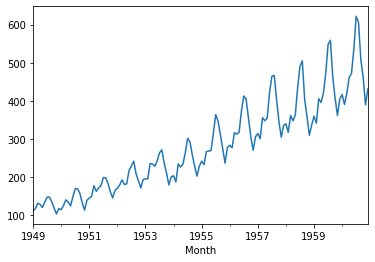

In [ ]:
#Let’s check for the trend graph of the dataset.
Airpassangers_df.plot()

The dataset trend shows that it is a kind of additive time series, but this feature dataset also has a slight seasonality and trend.

Let’s check for the two consecutive years trend to know the similarity more accurately. I am choosing the years 1957 and 1958 for the test.

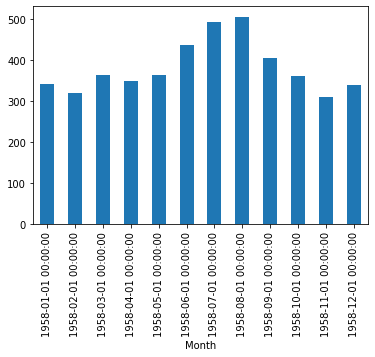

In [ ]:
 Airpassangers_df["1957"].plot(kind='bar')
 Airpassangers_df["1958"].plot(kind='bar') 

To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an autocorrelation plot.

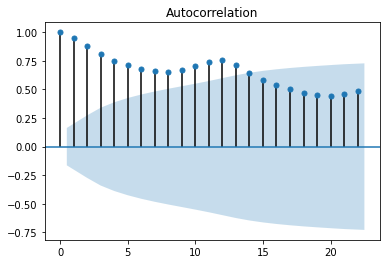

In [ ]:
 from statsmodels.graphics.tsaplots import plot_acf
 plot_acf(Airpassangers_df); 

Here the blue area is the confidence interval, and the candles started coming inside after the 13th candle. This can be due to the seasonality of 12-13 months.

In [ ]:
#We can cross-check it by dicky-fuller method
adf=adfuller(Airpassangers_df)
adf

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

Here in the output, we can see that the p-value of the data set is more than 0.05. Because of this reason, only we can interpret the data as non-stationary.

As we have seen that data is non-stationary, we can apply deseasonalization to the data set to make it more stable or stationary.

In [ ]:
Airpassangers_diff=Airpassangers_df.diff().dropna()
Airpassangers_diff

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64

In [ ]:
adfuller(Airpassangers_diff)

(-2.8292668241700056,
 0.054213290283824704,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

### Differencing over rolling mean taken for 12 months:


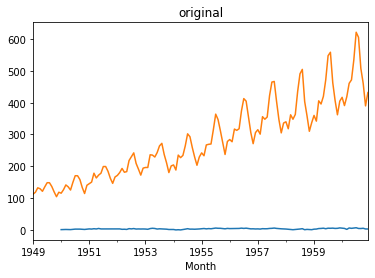

In [ ]:
rolling_mean= Airpassangers_df.rolling(window = 12).mean()
rolling_mean_diff = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
rolling_mean_diff.plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
Airpassangers_df.plot(title='original'); 

In [ ]:
#check the p value
adfuller(rolling_mean_diff.dropna())

(-3.3830207264924788,
 0.011551493085515055,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 333.0891598581692)

### Differencing over log-transformed time-series 

In [ ]:
log_airpassengers = pd.DataFrame(Airpassangers_df.apply(lambda x : np.log(x)))
log_airpassengers 

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
log_diff = (log_airpassengers) - (log_airpassengers).shift()
log_diff=log_diff.dropna()
log_diff

,#Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


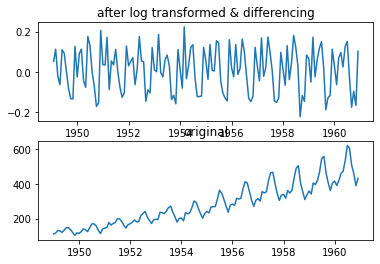

In [ ]:
#Let’s perform the deseasonalization on the data set.
#Differencing over log-transformed time-series 
# We try to normalize the seasonality value by the difference of log to passenger count and shifted the log value of passenger count to one step.
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(log_diff)
ax[0].set_title('after log transformed & differencing')

ax[1].plot(Airpassangers_df)
ax[1].set_title('original')
plt.tight_layout
plt.show()

Let’s check for the p-value of the log-transformed time-series 

In [ ]:
adfuller(log_diff)

(-2.7171305983881284,
 0.0711205481508595,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

The p-value is greater than 0.05, so we can interpret the data as still non-stationary.

Differencing over power-transformed time series

We have first power transformed the data and then made a difference between power transformed data and one shift.

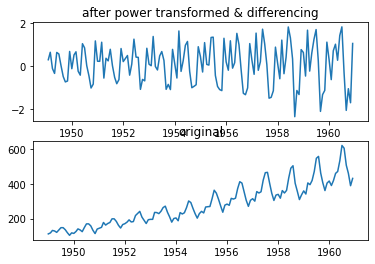

In [ ]:
powered_transform = Airpassangers_df.apply(lambda x : x ** 0.5)
powered_transform_diff = powered_transform - powered_transform.shift()
powered_transform_diff=powered_transform_diff.dropna()

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(powered_transform_diff)
ax[0].set_title('after power transformed & differencing')

ax[1].plot(Airpassangers_df)
ax[1].set_title('original')
plt.tight_layout
plt.show()

In [ ]:
 #check the p value
adfuller(powered_transform_diff)

(-3.186422291164197,
 0.02078418557126792,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 84.47415786409971)

Here in differencing overpower transformed time series, we have got a good p-value near about 0.02 and lower than 0.05 in that we can consider over data is stationary.